# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [ ]:
def seasons_india(month):
    if month in [12, 1, 2]:
        return 1   # Winter
    elif month in [3, 4, 5]:
        return 2   # Summer
    elif month in [6, 7, 8, 9]:
        return 3   # Monsoon
    else:
        return 4   # Post-monsoon

df['indian_season'] = df['month'].map(seasons_india)

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [ ]:
monthly_rent = df['count'].resample('ME').mean()
monthly_rent

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: ME, Name: count, dtype: float64

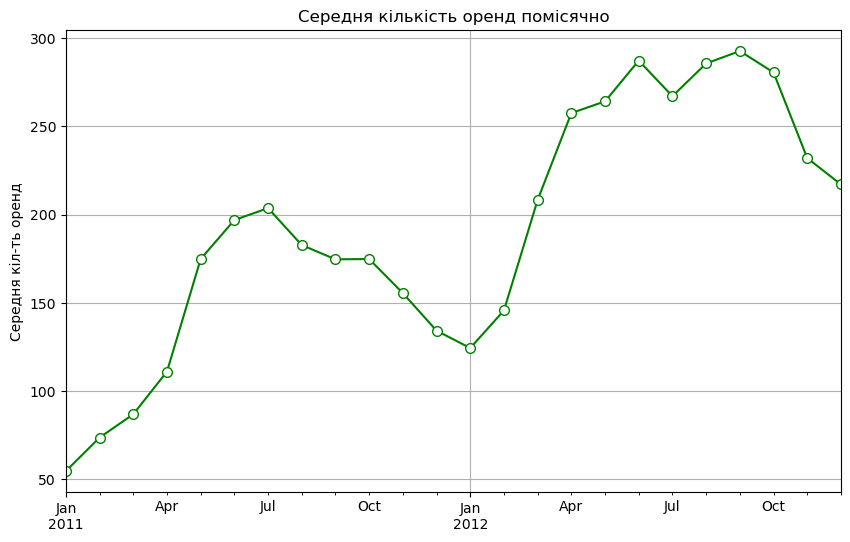

In [ ]:
monthly_rent.plot(
    figsize=(10, 6),
    color='green',
    marker='o',
    markersize=7,
    markerfacecolor='white',
    markeredgecolor='green',
    grid=True,
    title='Середня кількість оренд помісячно',
    ylabel='Середня кіл-ть оренд',
    xlabel=''
);

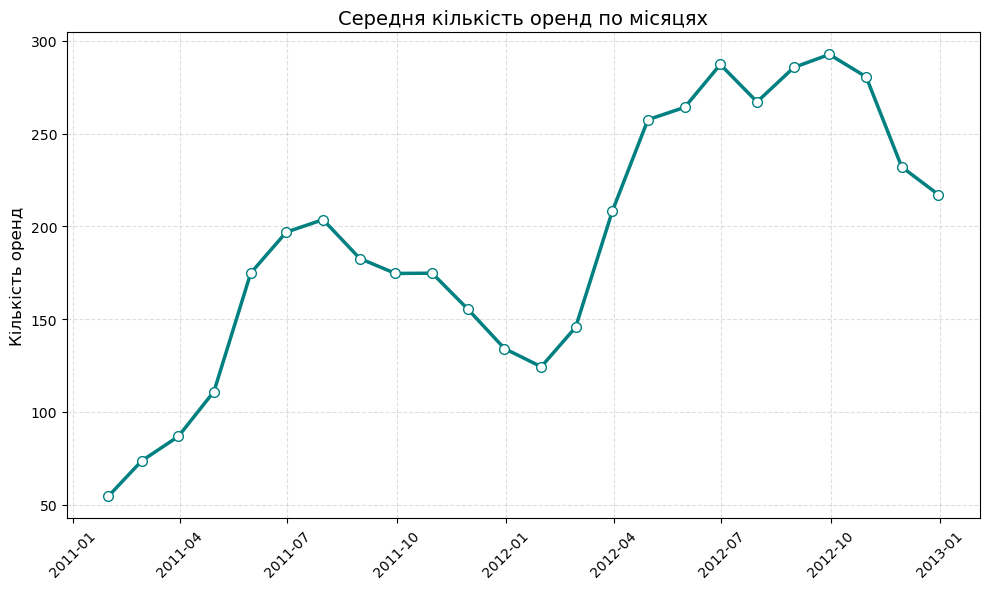

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(
    monthly_rent,
    color='teal',
    linewidth=2.5,
    marker='o',
    markersize=7,
    markerfacecolor='white',
    markeredgecolor='teal'
)

plt.title('Середня кількість оренд по місяцях', fontsize=14)
plt.xlabel('')
plt.ylabel('Кількість оренд', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Відповідь:**  
*Чим відрізняються 2 побудованих графіки? Який вам більше подобається?*  
Обидва графіки відображають ті самі дані, але виглядають вони по-різному. Графік, побудований за допомогою Pandas, вийшов простішим - він підійде, коли потрібно швидко подивитися на результат без додаткових налаштувань. Графік на Matplotlib виглядає охайніше та дозволяє точніше контролювати зовнішній вигляд, тому він виглядає більш наочним і приємним для сприйняття.

Особисто мені більше сподобався варіант з Matplotlib, бо він виглядає акуратніше і дає більше можливостей для оформлення, але для швидкого аналізу зручно використовувати і Pandas.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [ ]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

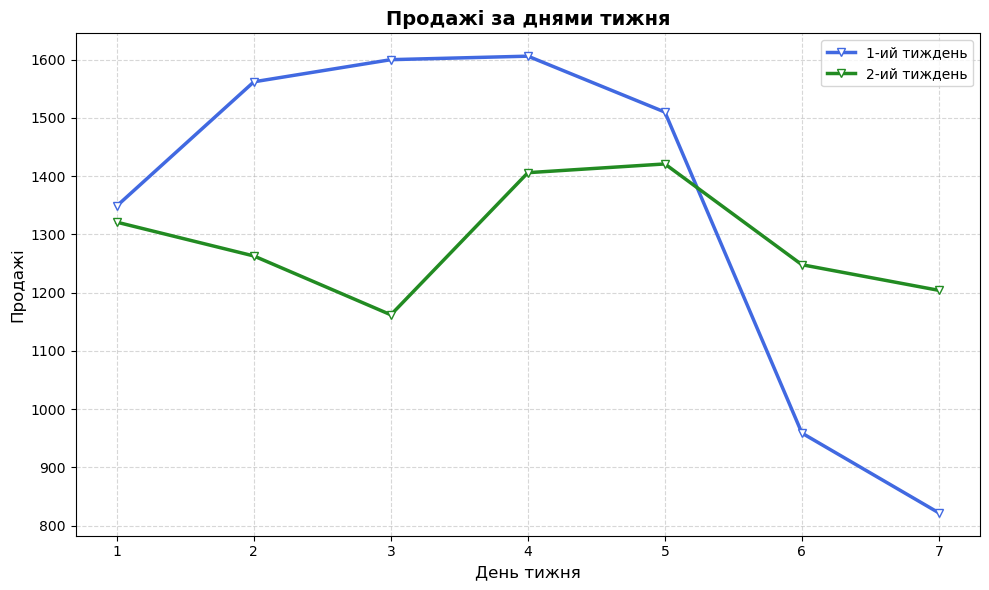

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(
    days, 
    sales_week1,
    linewidth=2.5,
    color='royalblue',
    marker='v',
    markersize=6,
    markerfacecolor='white',
    markeredgecolor='royalblue',
    label='1-ий тиждень'
)

plt.plot(
    days,
    sales_week2,
    linewidth=2.5,
    color='forestgreen',
    marker='v',
    markersize=6,
    markerfacecolor='white',
    markeredgecolor='forestgreen',
    label='2-ий тиждень'
)

plt.title('Продажі за днями тижня', fontsize=14, fontweight='bold')
plt.xlabel('День тижня', fontsize=12)
plt.ylabel('Продажі', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Відповіді:**  
1. *Судячи з графіку, в який тиждень проодажі були стабільніше?*  
    Судячи з графіку, в 2-ий тиждень продажі були більш стабільними протягом тижня. В 1-ий тиждень продажі збільшувались з понеділка по четвер, але з п'ятниці почали знижуватись, з дуже різким падінням у суботу та неділю.
2. *Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.*  
    Так, стабільність можна підтвердити за допомогою стандартного відхилення продажів за кожен тиждень. Нижче наведено обчислення і за отриманим результатом видно, що для 1-го тижня значення набагато більше, ніж у 2-го. Це означає, що продажі у 1-ий тиждень сильніше коливалися, тоді як у 2-ий тиждень залишалися більш рівними. Отже, обчислення підтверджують висновки зроблені на основі графіку.

In [ ]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

std_week1, std_week2

(np.float64(299.99857142517004), np.float64(90.9060964256355))

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [ ]:
avg_temp_monthly = df.groupby('month')['temp'].mean()
avg_rent_quarterly = df.groupby('season')['count'].mean()

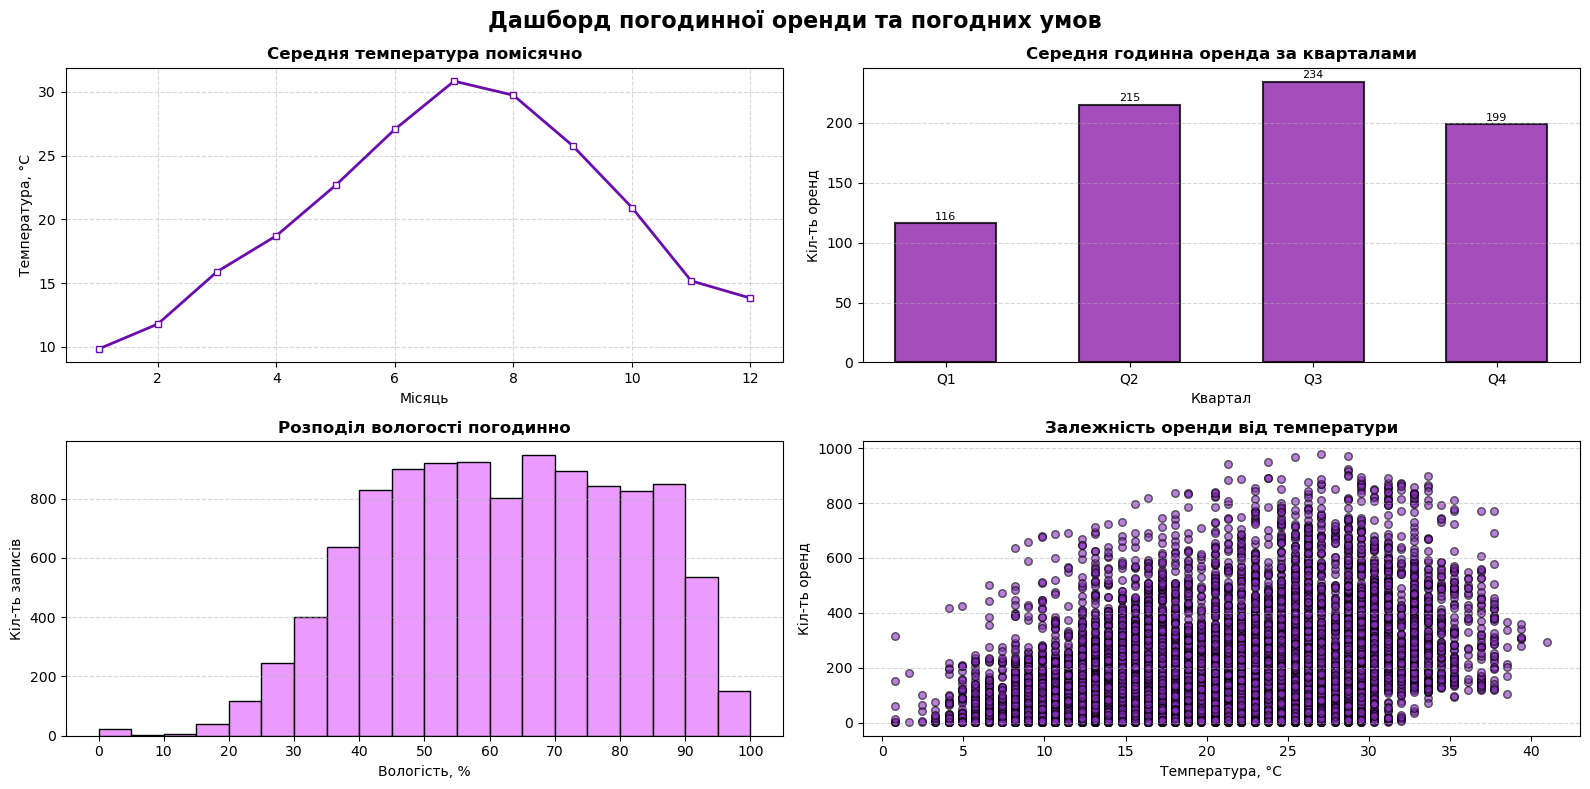

In [ ]:
plt.figure(figsize=(16, 8))

# Лінійний графік
plt.subplot(2, 2, 1)
plt.plot(
    avg_temp_monthly,
    linewidth=2,
    color='#6A0DAD',
    marker='s',
    markersize=5,
    markerfacecolor='white',
    markeredgecolor='#6A0DAD',
)
plt.title('Середня температура помісячно', fontsize=12, fontweight='bold')
plt.xlabel('Місяць', fontsize=10)
plt.ylabel('Температура, °C', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

#Стовпчикова діаграма
plt.subplot(2, 2, 2)
x = avg_rent_quarterly.index
y = avg_rent_quarterly.values
plt.bar(
    x,
    y,
    width=0.55,
    facecolor="#8E20AA",
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)
for x_pos, val in zip(x, y):
    plt.text(x_pos, val + 3, f'{val:.0f}', ha='center', fontsize=8)
plt.title('Середня годинна оренда за кварталами', fontsize=12, fontweight='bold')
plt.xlabel('Квартал', fontsize=10)
plt.ylabel('Кіл-ть оренд', fontsize=10)
plt.xticks(avg_rent_quarterly.index, ['Q1', 'Q2', 'Q3', 'Q4'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Гістограма
plt.subplot(2, 2, 3)
plt.hist(
    df['humidity'],
    bins=20,
    range=(0, 100),
    facecolor="#EB9BFF",
    edgecolor='black',
    linewidth=1
)
plt.title('Розподіл вологості погодинно', fontsize=12, fontweight='bold')
plt.xlabel('Вологість, %', fontsize=10)
plt.ylabel('Кіл-ть записів', fontsize=10)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Scatter plot
plt.subplot(2, 2, 4)
plt.scatter(
    df['temp'],
    df['count'],
    s=30,
    facecolor="#882CBDFF",
    edgecolor='black',
    alpha=0.6
)
plt.title('Залежність оренди від температури', fontsize=12, fontweight='bold')
plt.xlabel('Температура, °C', fontsize=10)
plt.ylabel('Кіл-ть оренд', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Дашборд погодинної оренди та погодних умов', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

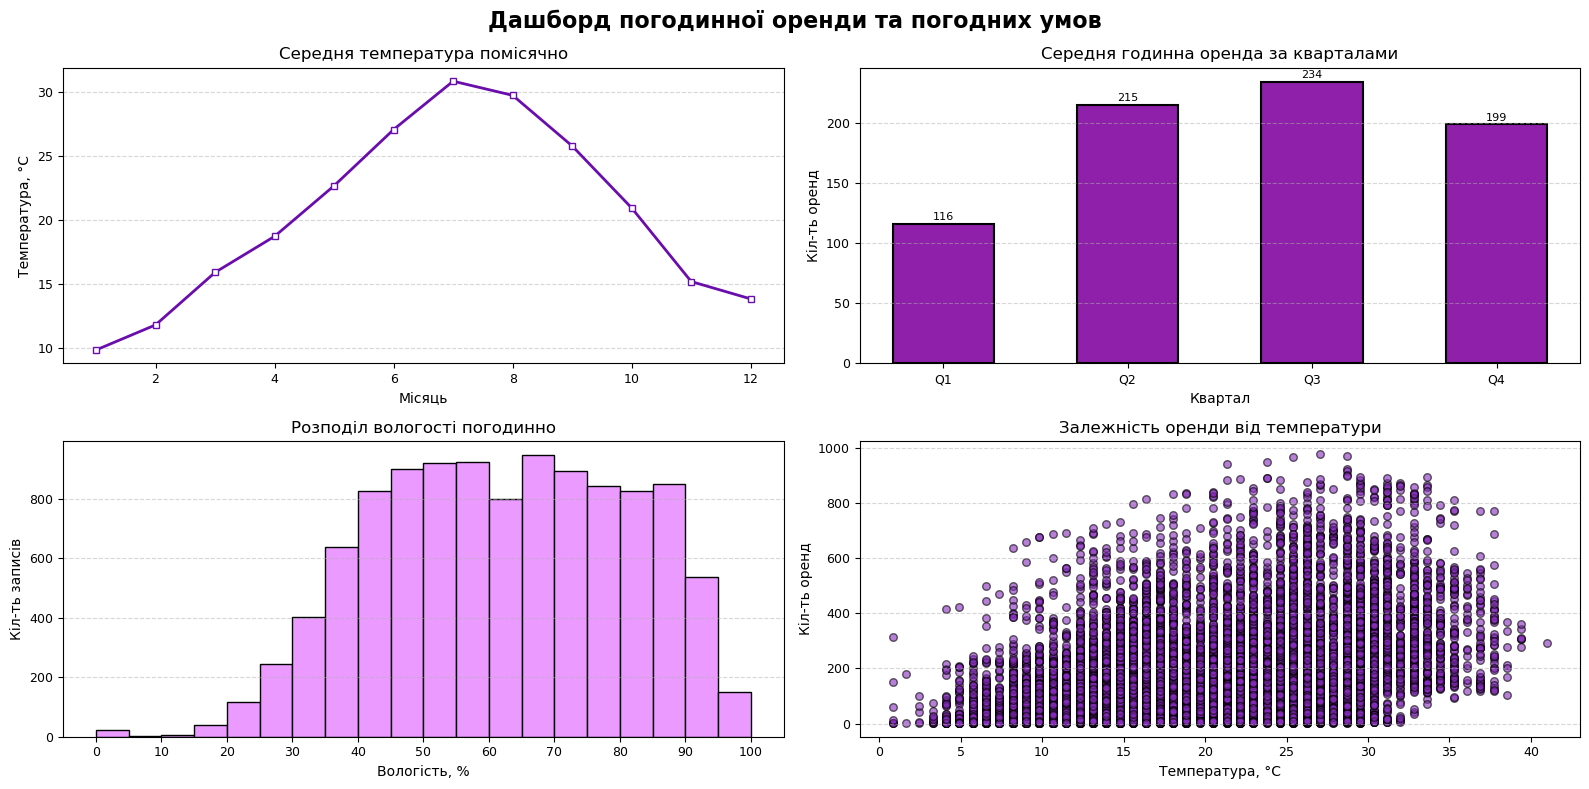

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for a in ax.flat:
    a.grid(axis='y', linestyle='--', alpha=0.5)  
    a.tick_params(labelsize=9)

ax[0, 0].plot(
    avg_temp_monthly,
    linewidth=2,
    color='#6A0DAD',
    marker='s',
    markersize=5,
    markerfacecolor='white',
    markeredgecolor='#6A0DAD',
)
ax[0, 0].set(
    title='Середня температура помісячно',
    xlabel='Місяць',
    ylabel='Температура, °C'
)

#Стовпчикова діаграма
x = avg_rent_quarterly.index
y = avg_rent_quarterly.values

ax[0, 1].bar(
    x,
    y,
    width=0.55,
    facecolor="#8E20AA",
    edgecolor='black',
    linewidth=1.5
)
for x_pos, val in zip(x, y):
    ax[0, 1].text(x_pos, val + 3, f'{val:.0f}', ha='center', fontsize=8)

ax[0, 1].set(
    title='Середня годинна оренда за кварталами',
    xlabel='Квартал',
    ylabel='Кіл-ть оренд',
    xticks=avg_rent_quarterly.index,
    xticklabels=['Q1', 'Q2', 'Q3', 'Q4']
)

# Гістограма
ax[1, 0].hist(
    df['humidity'],
    bins=20,
    range=(0, 100),
    facecolor="#EB9BFF",
    edgecolor='black',
    linewidth=1
)
ax[1, 0].set(
    title='Розподіл вологості погодинно',
    xlabel='Вологість, %',
    ylabel='Кіл-ть записів',
    xticks=range(0, 101, 10)
)

#Scatter plot
ax[1, 1].scatter(
    df['temp'],
    df['count'],
    s=30,
    facecolor="#882CBDFF",
    edgecolor='black',
    alpha=0.6
)
ax[1, 1].set(
    title='Залежність оренди від температури',
    xlabel='Температура, °C',
    ylabel='Кіл-ть оренд'
)

fig.suptitle('Дашборд погодинної оренди та погодних умов', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

**Відповідь**  
*Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?*  
    Коли я використовую plt.subplot(), то кожен графік створюється окремою командою, і через це код виходить довший і менш зручний. А з plt.subplots() все набагато простіше: я одразу отримую фігуру та всі осі, і можу звертатися до кожного графіка через `ax[row, col]`. Також набагато зручніше керувати оформленням і працювати з кількома графіками одночасно - я можу однією командою задати якийсь стиль або параметр для всіх графіків одразу, а потім при потребі змінити щось лише для одного конкретного.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями +
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери +
3. **Заливка області** між мінімумом та максимумом +
4. **Дві анотації:** для найвищого та найнижчого середнього значення +
5. **Горизонтальна лінія** середнього за весь рік +
6. **Двошарова сітка:** основна та допоміжна +
7. **Стилізована легенда** з тінню +
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [ ]:
monthly_rent = df['count'].resample('ME').agg(['mean', 'max', 'min'])

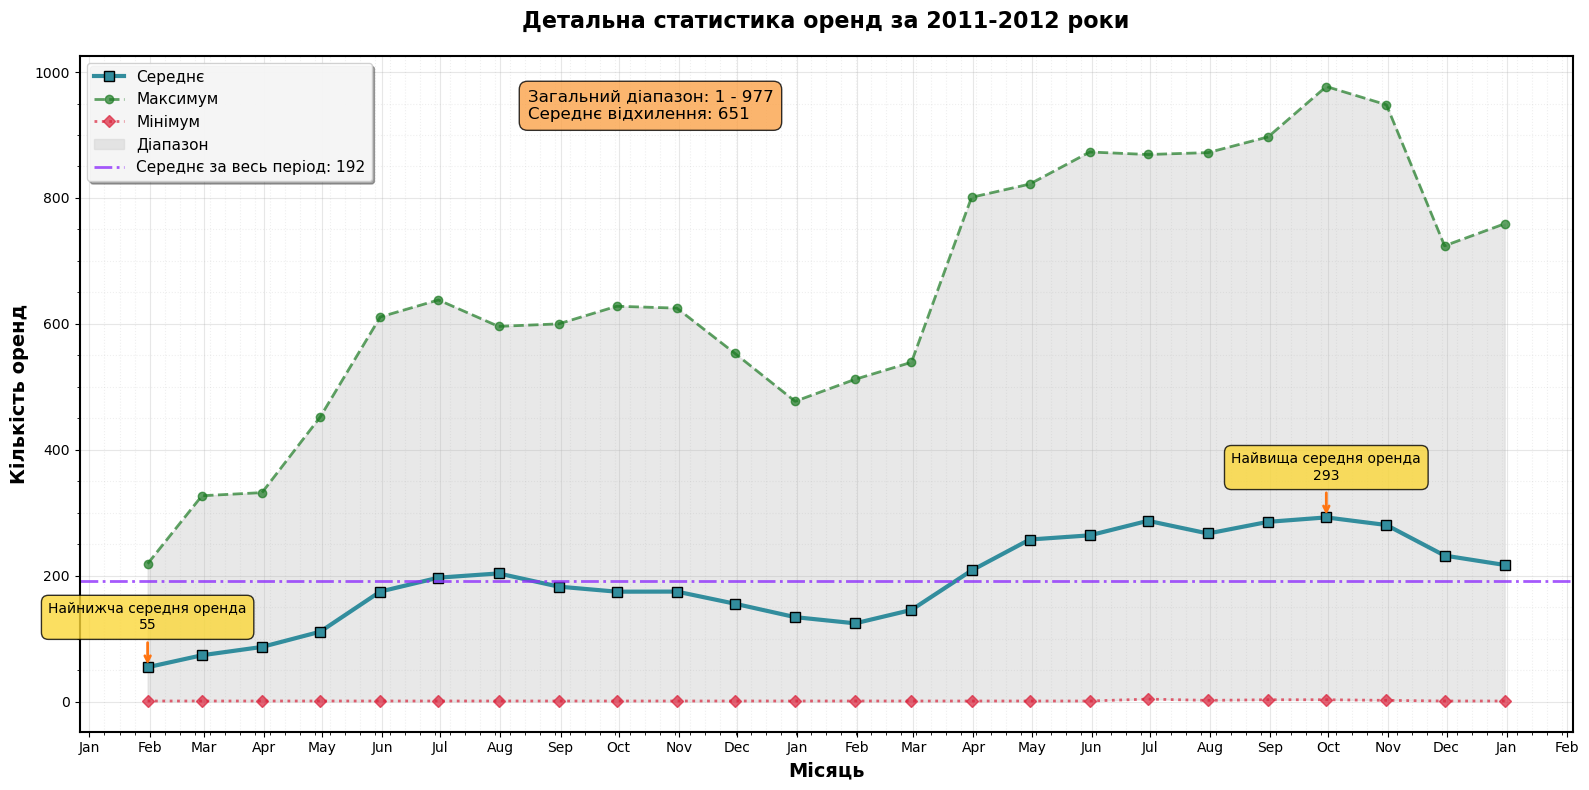

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

# Три лінії та різні стилі ліній
ax.plot(monthly_rent.index, monthly_rent['mean'], '-s', linewidth=3, 
        color="#328D9D", markersize=7, markeredgecolor='k', label='Середнє')
ax.plot(monthly_rent.index, monthly_rent['max'], '--o', linewidth=2,
        color="#1C7B23", markersize=6, label='Максимум', alpha=0.7)
ax.plot(monthly_rent.index, monthly_rent['min'], ':D', linewidth=2,
        color="#db223b", markersize=6, label='Мінімум', alpha=0.7)

#Заливка області
ax.fill_between(monthly_rent.index, monthly_rent['min'], monthly_rent['max'],
                alpha=0.5, color='lightgray', label='Діапазон')

# Дві анотації
max_idx = monthly_rent['mean'].idxmax()
max_val = monthly_rent['mean'].max()
ax.annotate(f'Найвища середня оренда\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 60),
            arrowprops=dict(arrowstyle='->', color="#ff7512", lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="#fbd739", alpha=0.8))

min_idx = monthly_rent['mean'].idxmin()
min_val = monthly_rent['mean'].min()
ax.annotate(f'Найнижча середня оренда\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 60),
            arrowprops=dict(arrowstyle='->', color="#ff7512", lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="#fbd739", alpha=0.8))

# Лінія середнього
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color="#8f30fc", linestyle='-.', linewidth=2,
           alpha=0.8, label=f'Середнє за весь період: {overall_mean:.0f}')

# Двошарова сітка
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Легенда
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Текстовий блок
textstr = f'Загальний діапазон: {monthly_rent["min"].min():.0f} - {monthly_rent["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(monthly_rent["max"] - monthly_rent["min"]).mean():.0f}'
props = dict(boxstyle='round, pad=0.5', facecolor="#fba34a", alpha=0.8)
ax.text(0.3, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренд за 2011-2012 роки',
             fontsize=16, fontweight='bold', pad=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()
